<a href="https://colab.research.google.com/github/MilagrosContrera/SOM/blob/main/Clustering_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías y datos

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.4 MB/s eta 0:00:00


In [ ]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395103 sha256=2dda93619023ddd4475b9e7fc87f2b7d12ce1619818bebaee7f63663d7171adb
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=54b1cd114786709e870411a6d406264437408595b35435286f287779dbac4dc8
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [ ]:
# Tratamiento de datos
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import openpyxl
from minisom import MiniSom

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
from matplotlib.patches import Ellipse
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.cluster import KMeans

from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Montar Google Drive en Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Cargar datos desde el archivo Excel
ruta_excel = '/content/drive/My Drive/Enfermo/enfermedad2.xlsx'
wb = openpyxl.load_workbook(ruta_excel)
hoja = wb.active

# Obtener datos de Excel y asignar valores numéricos
datos_totales = np.array([[celda for celda in fila] for fila in hoja.iter_rows(min_row=2, values_only=True)])
print(datos_totales)


Mounted at /content/drive
[[  1.   63.    1.  ...   0.    2.3   3. ]
 [  2.   67.    1.  ...   1.    1.5   2. ]
 [  3.   67.    1.  ...   1.    2.6   2. ]
 ...
 [301.   57.    1.  ...   1.    1.2   2. ]
 [302.   57.    0.  ...   0.    0.    2. ]
 [303.   38.    1.  ...   0.    0.    1. ]]


In [ ]:
print(datos_totales[:5])

[[  1.   63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3. ]
 [  2.   67.    1.    4.  160.  286.    0.    2.  108.    1.    1.5   2. ]
 [  3.   67.    1.    4.  120.  229.    0.    2.  129.    1.    2.6   2. ]
 [  4.   37.    1.    3.  130.  250.    0.    0.  187.    0.    3.5   3. ]
 [  5.   41.    0.    2.  130.  204.    0.    2.  172.    0.    1.4   1. ]]


x_data_col3: [1. 4. 4. 3. 2. 2. 4. 4. 4. 4. 4. 2. 3. 2. 3. 3. 2. 4. 3. 2. 1. 1. 2. 3.
 4. 3. 3. 1. 4. 4. 1. 4. 3. 4. 3. 4. 4. 4. 4. 3. 4. 1. 2. 3. 4. 3. 3. 4.
 3. 3. 2. 4. 4. 2. 4. 4. 3. 4. 3. 1. 4. 3. 4. 3. 4. 4. 3. 3. 4. 3. 3. 4.
 4. 4. 4. 3. 4. 3. 2. 4. 4. 4. 3. 3. 2. 3. 3. 3. 4. 3. 4. 4. 3. 3. 3. 4.
 4. 4. 2. 4. 4. 1. 4. 3. 3. 2. 4. 3. 4. 4. 4. 4. 1. 4. 3. 2. 3. 4. 4. 4.
 4. 4. 3. 4. 1. 2. 4. 4. 2. 4. 3. 3. 2. 4. 3. 2. 4. 2. 4. 3. 2. 1. 2. 3.
 3. 3. 4. 3. 2. 3. 1. 4. 3. 4. 4. 4. 4. 4. 4. 3. 2. 4. 3. 4. 3. 4. 3. 2.
 4. 2. 3. 4. 4. 4. 4. 4. 4. 4. 3. 3. 4. 4. 1. 1. 4. 2. 3. 2. 2. 3. 3. 4.
 4. 4. 3. 4. 1. 4. 2. 1. 4. 4. 3. 3. 4. 4. 4. 4. 2. 4. 3. 1. 3. 4. 4. 1.
 2. 4. 4. 4. 3. 3. 3. 4. 4. 2. 4. 3. 4. 4. 3. 4. 3. 2. 3. 4. 4. 4. 2. 2.
 2. 2. 4. 1. 3. 4. 4. 4. 4. 2. 4. 4. 4. 3. 4. 3. 4. 3. 2. 2. 3. 2. 1. 3.
 4. 4. 4. 3. 4. 3. 4. 4. 4. 4. 1. 1. 3. 3. 2. 4. 4. 3. 4. 2. 4. 4. 4. 2.
 2. 2. 3. 2. 4. 4. 4. 2. 4. 4. 1. 4. 4. 2. 3.]
x_data_col5: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 

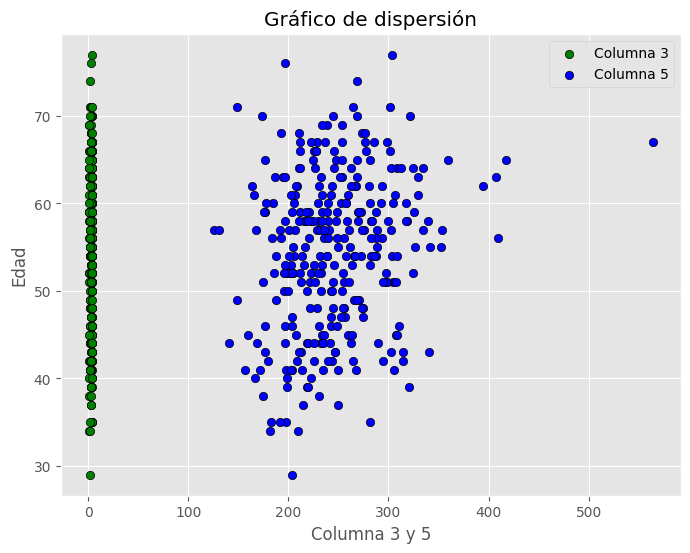

In [ ]:
# Seleccionar las columnas para el eje x y el eje y
x_data = datos_totales[:, [3, 5]]   # Columnas 3 (cp) y 5 (chol)
y_data = datos_totales[:, 1]        # Columna 1 (edad)
# Escalado de datos
X_scaled = scale(x_data)
Y_scaled = scale(y_data)

# Revisar los datos seleccionados
print("x_data_col3:", x_data[:, 0])
print("x_data_col5:", x_data[:, 1])

# Crear el gráfico de dispersión
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar los puntos correspondientes a la columna 3 (verde)
scatter_col3 = ax.scatter(
    x=x_data[:, 0],  # Usar la columna 3 en el eje x
    y=y_data,       # Usar la columna 2 en el eje y
    c='green',          # Color verde
    label='Columna 3',  # Etiqueta para la leyenda
    marker='o',
    edgecolor='black',
)

# Graficar los puntos correspondientes a la columna 7 (azul)
scatter_col5 = ax.scatter(
    x=x_data[:, 1],  # Usar la columna 7 en el eje x
    y=y_data,       # Usar la columna 2 en el eje y
    c='blue',           # Color azul
    label='Columna 5',  # Etiqueta para la leyenda
    marker='o',
    edgecolor='black',
)

ax.set_title('Gráfico de dispersión')
ax.set_xlabel('Columna 3 y 5')
ax.set_ylabel('Edad')

# Agregar leyenda
ax.legend()

plt.show()

#K- means

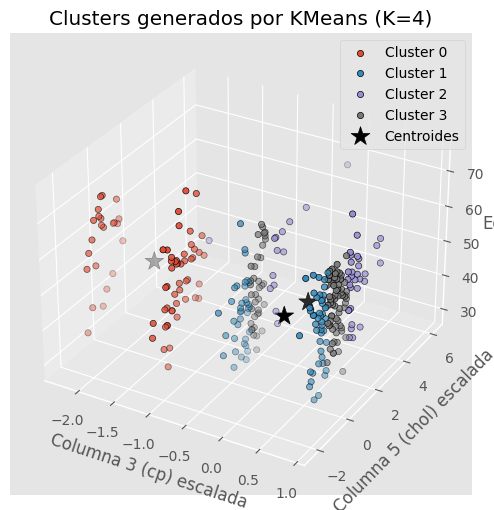

In [ ]:
# Inicializar y entrenar el modelo KMeans
modelo_kmeans = KMeans(n_clusters=4,  # Número de clusters
                       n_init=25,     # Número de inicializaciones
                       random_state=123)
modelo_kmeans.fit(X_scaled)

# Clasificación con el modelo KMeans
y_predict = modelo_kmeans.predict(X_scaled)

# Crear el gráfico tridimensional
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos por cluster
for i in np.unique(y_predict):
    ax.scatter(
        X_scaled[y_predict == i, 0],  # Columna 3 (cp) en el eje x
        X_scaled[y_predict == i, 1],  # Columna 5 (chol) en el eje y
        y_data[y_predict == i],       # Edad como color de los puntos
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f"Cluster {i}"
    )

# Ubicación de centroides
ax.scatter(
    modelo_kmeans.cluster_centers_[:, 0],
    modelo_kmeans.cluster_centers_[:, 1],
    [np.mean(y_data)] * len(modelo_kmeans.cluster_centers_),
    c='black',
    s=200,
    marker='*',
    label='Centroides'
)

ax.set_xlabel('Columna 3 (cp) escalada')
ax.set_ylabel('Columna 5 (chol) escalada')
ax.set_zlabel('Edad')
ax.set_title('Clusters generados por KMeans (K=4)')
ax.legend()

plt.show()


In [ ]:
# Calcular el índice de silueta
labels = modelo_kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, labels)

print("El índice de silueta es:", silhouette_avg)

El índice de silueta es: 0.37445392470722283


In [ ]:
labels = modelo_kmeans.labels_

print(davies_bouldin_score(X_scaled, labels))

0.9585659961588522


#K - medoids

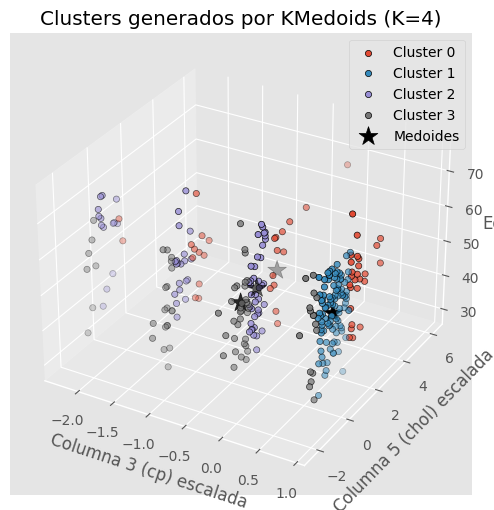

In [ ]:
from sklearn_extra.cluster import KMedoids

# Inicializar y entrenar el modelo KMedoids
modelo_kmedoids = KMedoids(n_clusters=4,  # Número de clusters
                           random_state=120)
modelo_kmedoids.fit(X_scaled)

# Clasificación con el modelo KMedoids
y_predict = modelo_kmedoids.predict(X_scaled)

# Crear el gráfico tridimensional
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos por cluster
for i in np.unique(y_predict):
    ax.scatter(
        X_scaled[y_predict == i, 0],  # Columna 3 (cp) en el eje x
        X_scaled[y_predict == i, 1],  # Columna 5 (chol) en el eje y
        y_data[y_predict == i],       # Edad en el eje z
        c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker='o',
        edgecolor='black',
        label=f"Cluster {i}"
    )

# Ubicación de medoides
ax.scatter(
    modelo_kmedoids.cluster_centers_[:, 0],
    modelo_kmedoids.cluster_centers_[:, 1],
    [np.mean(y_data)] * len(modelo_kmedoids.cluster_centers_),
    c='black',
    s=200,
    marker='*',
    label='Medoides'
)

ax.set_xlabel('Columna 3 (cp) escalada')
ax.set_ylabel('Columna 5 (chol) escalada')
ax.set_zlabel('Edad')
ax.set_title('Clusters generados por KMedoids (K=4)')
ax.legend()


plt.show()

In [ ]:
# Calcular el índice de silueta
labels = modelo_kmedoids.labels_
silhouette_avg = silhouette_score(X_scaled, labels)

print("El índice de silueta es:", silhouette_avg)

El índice de silueta es: 0.3106496895965823


In [ ]:
labels = modelo_kmedoids.labels_

print(davies_bouldin_score(X_scaled, labels))

1.1945500078503923


#DBSCAN

In [ ]:
# Escalado de datos
# ==============================================================================
#X = datos.drop(columns='shape').to_numpy()
#X_scaled = scale(X)
# Modelo
# metric: métrica utilizada como distancia. Puede ser: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. Si se utiliza linkage=“ward”, solo se permite “euclidean”.
modelo_dbscan = DBSCAN(
                    eps          = 0.5,
                    min_samples  = 5,
                    metric       = 'euclidean',
                )

modelo_dbscan.fit(X_scaled)

DBSCAN()

El índice de silueta es: 0.34421021256421985


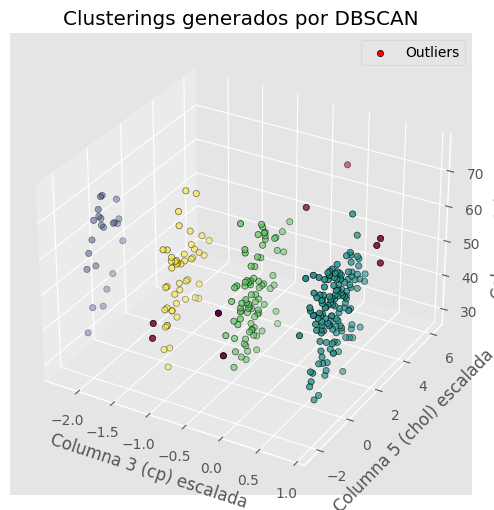

In [ ]:
# Obtener las etiquetas de los clusters
labels = modelo_dbscan.labels_

from sklearn.metrics import silhouette_score

# Calcular el índice de silueta
silhouette_avg = silhouette_score(X_scaled, labels)

print("El índice de silueta es:", silhouette_avg)


# Crear el gráfico tridimensional
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos
ax.scatter(
    X_scaled[:, 0],  # Columna 3 (cp) en el eje x
    X_scaled[:, 1],  # Columna 5 (chol) en el eje y
    datos_totales[:, 1],  # Columna 1 (edad) en el eje z
    c=labels,
    cmap='viridis',
    marker='o',
    edgecolor='black'
)

# Identificar outliers (puntos con etiqueta -1)
ax.scatter(
    X_scaled[labels == -1, 0],  # Columna 3 (cp) para outliers
    X_scaled[labels == -1, 1],  # Columna 5 (chol) para outliers
    datos_totales[labels == -1, 1],  # Columna 1 (edad) para outliers
    c='red',
    marker='o',
    edgecolor='black',
    label='Outliers'
)

ax.set_xlabel('Columna 3 (cp) escalada')
ax.set_ylabel('Columna 5 (chol) escalada')
ax.set_zlabel('Columna 1 (edad)')
ax.set_title('Clusterings generados por DBSCAN')
ax.legend()

plt.show()

In [ ]:
# Número de clusters y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')


Número de clusters encontrados: 3
Número de outliers encontrados: 0


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Obtener las etiquetas de los clusters
labels = modelo_dbscan.labels_

# Calcular el índice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_scaled, labels)

print("El índice de Davies-Bouldin es:", davies_bouldin)


El índice de Davies-Bouldin es: 2.273818755103278


#SOM

Error de cuantización: 0.8881635823864035


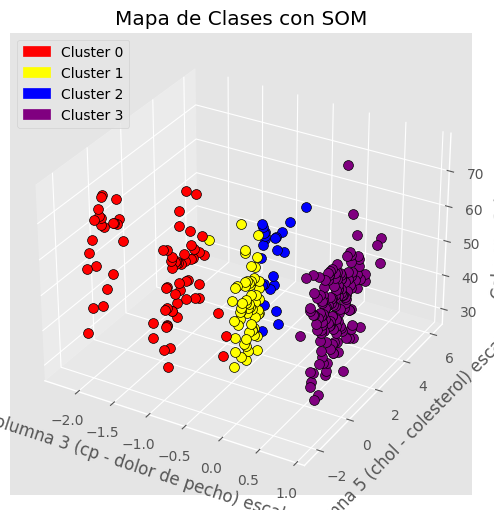

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch # Importar la clase Patch


# Configurar y entrenar el SOM con 5 clusters
dimensiones_mapa = (4, 1)  # Ajusta el tamaño del mapa
tasa_aprendizaje = 0.2 # Ajusta la tasa de aprendizaje
num_iteraciones = 10000  # Ajusta el número de iteraciones

som_clasificacion = MiniSom(dimensiones_mapa[0], dimensiones_mapa[1], X_scaled.shape[1], sigma=4, learning_rate=tasa_aprendizaje, random_seed=42)
som_clasificacion.random_weights_init(X_scaled)
som_clasificacion.train_random(X_scaled, num_iteraciones)

# Calcular el error de cuantización una métrica que comprueba la distancia media entre cada punto de datos
# Cuanto menor sea el error de cuantización, mejor será la representación del SOM de los datos de entrada.
error_cuantizacion = som_clasificacion.quantization_error(X_scaled)

print("Error de cuantización:", error_cuantizacion)

# Asignar cada punto al cluster más cercano
etiquetas_clusters = np.array([som_clasificacion.winner(x) for x in X_scaled])

# Obtener el número de clusters
num_clusters = len(np.unique(etiquetas_clusters))

# Definir colores para cada punto según su cluster
colores_puntos = ['red', 'yellow', 'blue', 'purple', 'green', 'pink']

# Definir etiquetas para los clusters
etiquetas = ['Cluster {}'.format(i) for i in range(num_clusters)]


# Crear un diccionario para mapear los índices de los clusters a sus etiquetas
etiquetas_dict = {cluster: etiquetas[cluster] for cluster in np.unique(etiquetas_clusters)}

# Visualización de resultados

# Crear el gráfico tridimensional
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X_scaled)): # itera sobre cada punto en el conjunto de datos escalados
    # Obtener el color correspondiente al cluster del punto actual
    color_punto = colores_puntos[etiquetas_clusters[i, 0]] # se asigna un color correspondiente al cluster al que pertenece ese punto, utilizando las etiquetas de los clusters almacenadas

    # Graficar el punto con el color asignado
    ax.scatter(
        X_scaled[i, 0],
        X_scaled[i, 1],
        datos_totales[i, 1],  # Usar la edad del paciente como coordenada z
        c=color_punto,
        s=50,
        edgecolors='k',  # Agregar bordes negros para distinguir los puntos
        label=etiquetas_dict[etiquetas_clusters[i, 0]]  # Usar las etiquetas del diccionario
    )

# Configurar las etiquetas de los ejes
ax.set_xlabel('Columna 3 (cp - dolor de pecho) escalada')
ax.set_ylabel('Columna 5 (chol - colesterol) escalada')
ax.set_zlabel('Columna 1 (edad)')

plt.title('Mapa de Clases con SOM')

# Mostrar la leyenda con etiquetas únicas y colores correspondientes
plt.legend(handles=[Patch(color=color, label=label) for color, label in zip(colores_puntos, etiquetas)], loc='upper left')

plt.show()





In [ ]:
# Calcular el número de clusters
numero_clusters = dimensiones_mapa[0] * dimensiones_mapa[1]

print("Número de clusters generados:", numero_clusters)

Número de clusters generados: 4


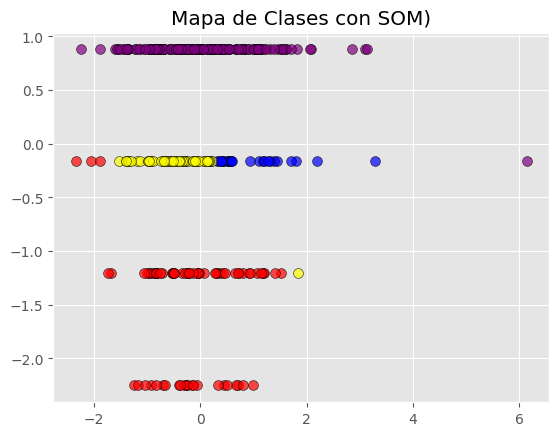

In [ ]:
for i in range(len(X_scaled)):
    # Obtener el color correspondiente al cluster del punto actual
    color_punto = colores_puntos[etiquetas_clusters[i, 0]]

    # Graficar el punto con el color asignado
    plt.scatter(
        x = X_scaled[i, 1], #cp - dolor de pecho
        y = X_scaled[i, 0], #chol -colesterol
        alpha=0.7,
        c=color_punto,
        s=50,
        edgecolors='k',  # Agregar bordes negros para distinguir los puntos

    )


plt.title('Mapa de Clases con SOM)')
plt.show()

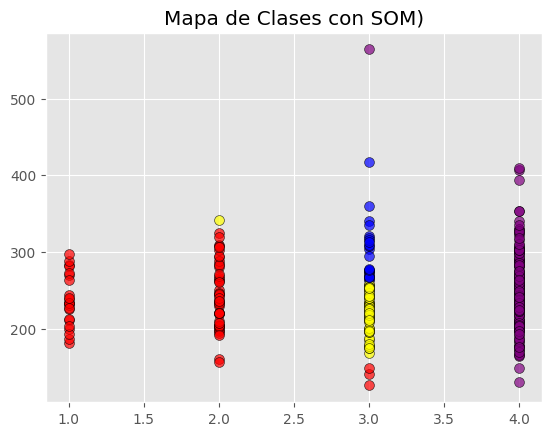

In [ ]:
for i in range(len(datos_totales)):
    # Obtener el color correspondiente al cluster del punto actual
    color_punto = colores_puntos[etiquetas_clusters[i, 0]]

    # Graficar el punto con el color asignado
    plt.scatter(
        x = datos_totales[i, 3], #cp - dolor de pecho
        y = datos_totales[i, 5], #chol -colesterol
        alpha=0.7,
        c=color_punto,
        s=50,
        edgecolors='k',  # Agregar bordes negros para distinguir los puntos

    )


plt.title('Mapa de Clases con SOM)')
plt.show()

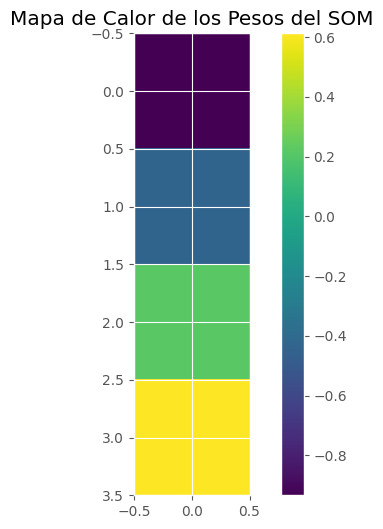

In [ ]:


# Crear un mapa de calor de los pesos
plt.figure(figsize=(8, 6))
plt.imshow(weights[:,:,0], cmap='viridis', interpolation='nearest')  # Selecciona la primera característica para visualización
                                                                     #viridis, va desde el morado oscuro para los valores más bajos hasta el amarillo para los valores más altos.
plt.title('Mapa de Calor de los Pesos del SOM')
plt.colorbar()
plt.show()


In [ ]:
# Asignar cada punto al cluster más cercano
etiquetas_clusters = np.array([som_clasificacion.winner(x)[0] for x in X_scaled])

# Calcular el índice de silueta
silhouette_avg = silhouette_score(X_scaled, etiquetas_clusters)

print("El índice de silueta es:", silhouette_avg)


El índice de silueta es: 0.2520647975467478


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Obtener las etiquetas de los clusters
etiquetas_clusters = np.array([som_clasificacion.winner(x)[0] for x in X_scaled])

# Calcular el índice de Davies-Bouldin
davies_bouldin = davies_bouldin_score(X_scaled, etiquetas_clusters)

print("El índice de Davies-Bouldin es:", davies_bouldin)

El índice de Davies-Bouldin es: 1.0225795935787894


In [ ]:
# Crear un diccionario para almacenar los puntos de cada cluster
puntos_por_cluster = {}

# Iterar sobre las etiquetas de cluster y los datos
for etiqueta, dato in zip(etiquetas_clusters, X_scaled):
    # Si el cluster aún no está en el diccionario, agregarlo con una lista vacía
    if etiqueta not in puntos_por_cluster:
        puntos_por_cluster[etiqueta] = []
    # Agregar el dato al cluster correspondiente
    puntos_por_cluster[etiqueta].append(dato)

# Imprimir los valores de cada cluster
for etiqueta, puntos in puntos_por_cluster.items():
    print(f"Cluster {etiqueta}:")
    for punto in puntos:
        print(punto)


Cluster 0:
[-2.25177456 -0.2649003 ]
[-1.20852121 -0.82592199]
[-1.20852121 -0.20686358]
[-1.20852121  0.91517979]
[-1.20852121  0.31546696]
[-1.20852121 -0.34228261]
[-1.20852121  0.37350368]
[-2.25177456 -0.69050296]
[-2.25177456  0.70237846]
[-1.20852121  0.72172404]
[-2.25177456 -0.40031933]
[-2.25177456 -0.14882685]
[-2.25177456 -0.92264987]
[-1.20852121  1.0699444 ]
[-1.20852121 -0.94199544]
[-1.20852121 -0.53573836]
[-2.25177456 -0.65181181]
[-1.20852121 -0.0327534 ]
[-1.20852121  1.51489263]
[-0.16526786 -2.04469324]
[-1.20852121 -0.88395872]
[-2.25177456 -1.25152465]
[-1.20852121  1.20536342]
[-2.25177456 -1.17414235]
[-1.20852121 -0.84526757]
[-2.25177456  0.68303289]
[-1.20852121 -0.24555473]
[-1.20852121 -0.51639278]
[-1.20852121 -0.82592199]
[-1.20852121  0.06397448]
[-1.20852121  0.66368731]
[-1.20852121 -0.49704721]
[-2.25177456  0.79910634]
[-1.20852121 -0.80657641]
[-1.20852121  1.18601785]
[-2.25177456  0.99256209]
[-1.20852121 -0.96134102]
[-1.20852121  0.79910634]
[

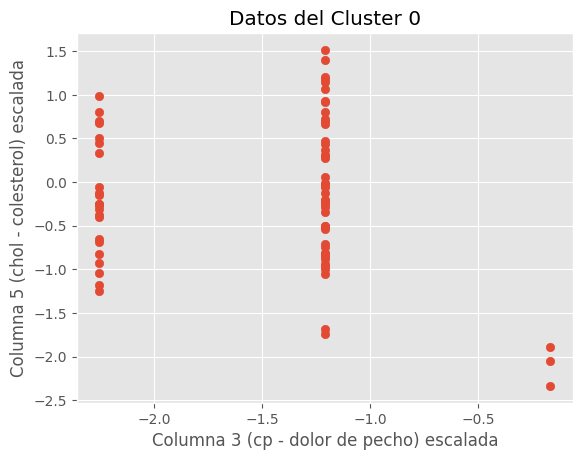

In [ ]:
# Suponiendo que tienes los datos del cluster 0 en un arreglo llamado cluster_0_data
cluster_0_data = np.array([
    [-2.25177456, -0.2649003 ],
[-1.20852121, -0.82592199],
[-1.20852121, -0.20686358],
[-1.20852121,  0.91517979],
[-1.20852121,  0.31546696],
[-1.20852121, -0.34228261],
[-1.20852121, 0.37350368],
[-2.25177456, -0.69050296],
[-2.25177456,  0.70237846],
[-1.20852121,  0.72172404],
[-2.25177456, -0.40031933],
[-2.25177456, -0.14882685],
[-2.25177456, -0.92264987],
[-1.20852121,  1.0699444 ],
[-1.20852121, -0.94199544],
[-1.20852121, -0.53573836],
[-2.25177456, -0.65181181],
[-1.20852121, -0.0327534 ],
[-1.20852121,  1.51489263],
[-0.16526786, -2.04469324],
[-1.20852121, -0.88395872],
[-2.25177456, -1.25152465],
[-1.20852121,  1.20536342],
[-2.25177456, -1.17414235],
[-1.20852121, -0.84526757],
[-2.25177456,  0.68303289],
[-1.20852121, -0.24555473],
[-1.20852121, -0.51639278],
[-1.20852121, -0.82592199],
[-1.20852121,  0.06397448],
[-1.20852121,  0.66368731],
[-1.20852121, -0.49704721],
[-2.25177456,  0.79910634],
[-1.20852121, -0.80657641],
[-1.20852121,  1.18601785],
[-2.25177456,  0.99256209],
[-1.20852121, -0.96134102],
[-1.20852121,  0.79910634],
[-1.20852121, -1.67712731],
[-2.25177456, -0.05209898],
[-2.25177456,  0.45088598],
[-1.20852121, -1.00003217],
[-1.20852121, -0.01340782],
[-1.20852121, 0.70237846],
[-2.25177456, -0.24555473],
[-1.20852121, -0.05209898],
[-2.25177456,  0.50892271],
[-0.16526786, -2.33487687],
[-1.20852121,  0.29612138],
[-2.25177456, -0.30359146],
[-2.25177456, -1.03872332],
[-1.20852121, -0.82592199],
[-1.20852121, -0.70984854],
[-0.16526786, -1.88992864],
[-1.20852121,  0.43154041],
[-1.20852121,  0.47023156],
[-1.20852121,  0.93452537],
[-1.20852121, -0.22620915],
[-1.20852121,  1.1473267 ],
[-2.25177456, -0.24555473],
[-1.20852121, -0.74853969],
[-1.20852121, -0.0327534 ],
[-1.20852121,  0.27677581],
[-1.20852121,  1.39881918],
[-2.25177456, -0.12948128],
[-2.25177456, -0.82592199],
[-2.25177456, -0.38097376],
[-1.20852121, -0.28424588],
[-1.20852121, -1.05806889],
[-1.20852121, -0.51639278],
[-1.20852121, -0.49704721],
[-1.20852121, -0.12948128],
[-1.20852121, -1.73516403],
[-2.25177456,  0.33481253],
[-1.20852121, -0.20686358]
])



# Visualización de los datos en el espacio bidimensional
plt.scatter(cluster_0_data[:, 0], cluster_0_data[:, 1])
plt.xlabel('Columna 3 (cp - dolor de pecho) escalada')
plt.ylabel('Columna 5 (chol - colesterol) escalada')
plt.title('Datos del Cluster 0')
plt.show()



#Hierarchical clustering

In [ ]:
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
# Modelos
# ==============================================================================
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean', #métrica utilizada como distancia. Puede ser: “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”.
                            linkage  = 'complete', # tipo de linkage utilizado. Puede ser “ward”, “complete”, “average” o “single”.
                            distance_threshold = 0, # distancia (altura del dendograma) a partir de la cual se dejan de unir los clusters. Indicar 0 para crecer todo el árbol.
                            n_clusters         = None #determina el número de clusters que se van a generar.
                        )
modelo_hclust_complete.fit(X_scaled)

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X_scaled)

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X_scaled)

AgglomerativeClustering(affinity='euclidean', distance_threshold=0,
                        n_clusters=None)

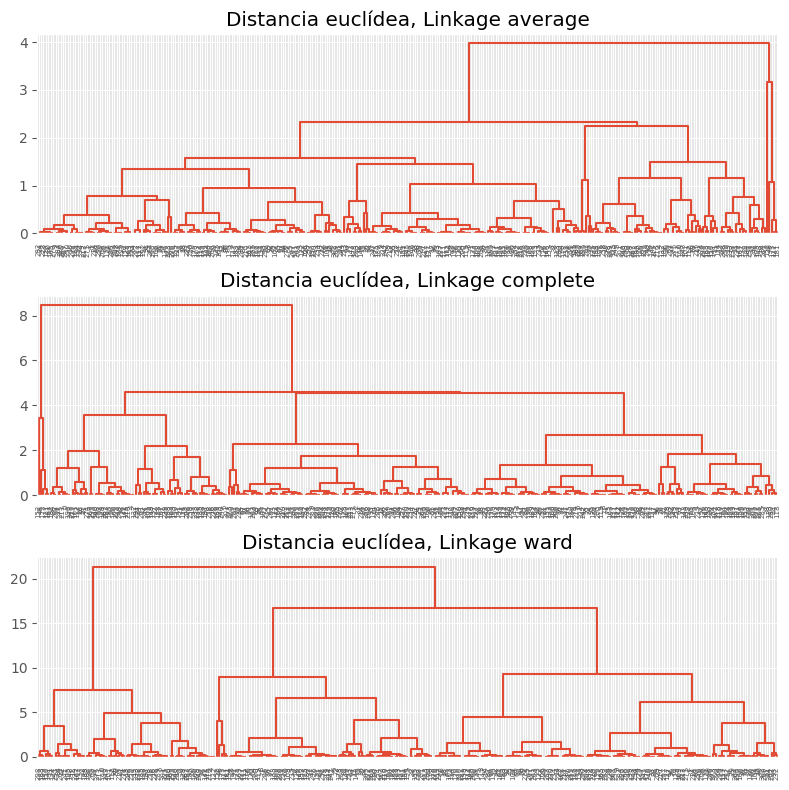

In [ ]:
# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout()

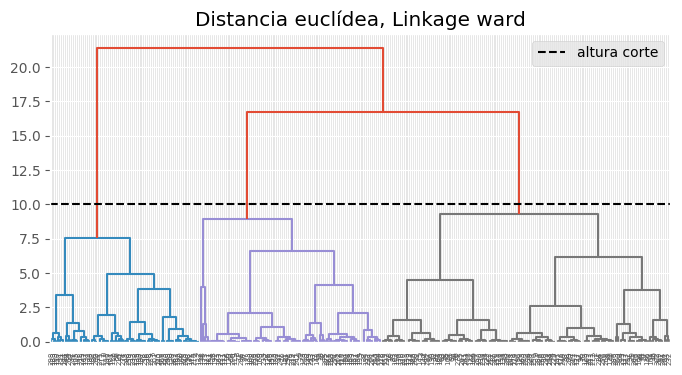

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
altura_corte = 10
plot_dendrogram(modelo_hclust_ward, color_threshold=altura_corte, ax=ax)
ax.set_title("Distancia euclídea, Linkage ward")
ax.axhline(y=altura_corte, c = 'black', linestyle='--', label='altura corte')
ax.legend()

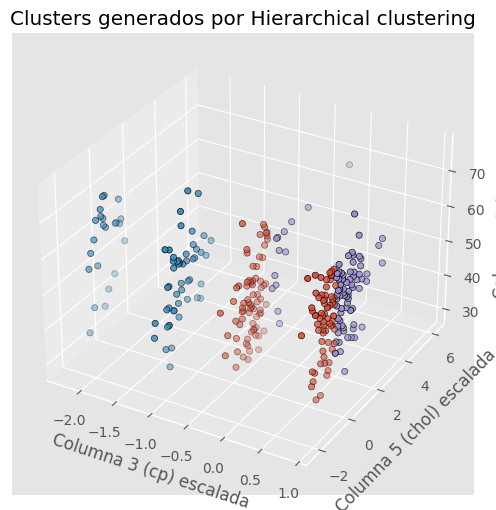

In [ ]:
# Modelo
# ==============================================================================
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters = 3
                     )
modelo_hclust_ward.fit(X_scaled)

# Clasificación
# ==============================================================================
labels = modelo_hclust_ward.labels_

#____________________________________________________________________
# Crear el gráfico tridimensional
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in set(labels):
    # Filtrar puntos de datos por cluster
    cluster_points = X_scaled[labels == cluster_id]
    ax.scatter(
        cluster_points[:, 0],  # Primera característica
        cluster_points[:, 1],  # Segunda característica
        datos_totales[labels == cluster_id, 1],  # Usar datos_totales para la tercera característica
        label=f'Cluster {cluster_id}',
        marker='o',
        edgecolor='black'
    )

ax.set_title('Clusters generados por Hierarchical clustering')
# Configurar las etiquetas de los ejes
ax.set_xlabel('Columna 3 (cp) escalada')
ax.set_ylabel('Columna 5 (chol) escalada')
ax.set_zlabel('Columna 1 (edad)')
plt.show()


#Métricas

- En el índice de silueta, cuanto más cerca de 1 esté el valor, mejor será la calidad de los clusters.

- En el índice Davies-Bouldin, un valor más bajo indica una mejor separación entre los clusters.